# Project 6 (part b):

## Lecture/(Part a)  Reminder

### The Game of Life
The Game of Life is a cellular automaton devised by the British mathematician John Horton Conway in 1970.<img align="right" src="Grid.png" HEIGHT="400" WIDTH="266"> 

The "game" is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves.

The universe of the Game of Life is an infinite two-dimensional array of square cells, each of which is in one of two possible states:

- alive: cell has value = 1
- dead: cell has value = 0

Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. See Figure 1.

### Rules of the game:

At each step in time (also called "tick"), the following transitions occur to all cells simultaneously:

1. Any live cell with fewer than two live neighbours dies, as if caused by underpopulation.

2. Any live cell with two or three live neighbours lives on to the next generation.

3. Any live cell with more than three live neighbours dies, as if by overpopulation.

4. Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

### Alternative rules

Conway's Life is classified as following the $\textbf{B}$3/$\textbf{S}$23 rule.

Specifically a cell:
- is $\textbf{B}$orn if it has exactly 3 neighbours
- $\textbf{S}$urvives if it has 2 or 3 living neighbours 
- it dies otherwise.

Another member in the family of "Life" cellular automata is ``HighLife`` that follow the $\textbf{B}$36/$\textbf{S}$23 rule.

A cell:
- is $\textbf{B}$orn if it has 3 or 6 neighbours
- $\textbf{S}$urvives if it has 2 or 3 living neighbours 
- it dies otherwise.

### Universe Topology

In principle, the universe of the Game of Life is infinite.  But computers have finite memory. To simplify things one can either ingore cells that have moved far away from the visible grid (stop tracking them after a distance from the boundaries), or can use a toroidal boundary conditions  (meaning that cells that reach an edge on one side re-enter the universe on the opposite side).

In [1]:
# Weekly functions (until I build a module to import) & imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams["animation.html"] = "html5"

def GeneralListPlot(XList, YList, xlabel='X', ylabel='Y'):
    """A general function to plot 2 lists of floats, and label their axes"""
    plt.plot(XList, YList)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return()

In [2]:
class Game:
    
    def __init__ (self, file, S = [2,3], B = [3]): # Where S & B are survival and birth criteria
        self.B = B
        self.S = S
        self.world = np.loadtxt(file, dtype=np.int8)
        self.frame = 0 #Frame number/number of frames since start
        #Save the initial world, helps find the period
        self.initworld = self.world.copy()
        
    def __next__(self):
        """Generates the next frame of the game"""
        x_dim, y_dim = self.world.shape
        arr_next = np.zeros([x_dim, y_dim], dtype=np.int8)
        for i in range (x_dim):
            for j in range (y_dim):
                SurrCh = self.surrounds(i,j)
                if SurrCh in self.S and self.world[i,j] == 1:
                    arr_next[i,j] = self.world[i,j]
                elif SurrCh in self.B and self.world[i,j] == 0:
                    arr_next[i,j] = 1
                else:
                    arr_next[i,j] = 0 # <= to_unsigned(0,0);
        self.world = arr_next.reshape((x_dim, y_dim))
        self.frame += 1
        
    def living(self):
        """Returns the number of currently living cells in the world"""
        N = sum(self.world.flatten())
        return(N)
    
    def surrounds(self, x, y):
        """Checks the surroundings of a cell and returns the number of lives cells around it"""
        arr = []
        for i in range (-1, 2):
            for j in range (-1, 2):
                try:
                    arr.append(self.world[x+i,y+j])
                except IndexError:
                    arr.append(0)
        sum_ = sum(arr) - self.world[x,y]
        return(sum_)
        
    def livlocs(self):
        """Returns the locations of all the living cells in the world"""
        x, y = np.where(self.world == 1)
        return(x, y)
    
    def BCentre(self, DEBUG = 0):
        """Finds the Barycentre of the living cells of the board"""
        x, y = self.livlocs()
        xcent = sum(x)/self.living()
        ycent = sum(y)/self.living()
        if DEBUG == 1:
            print(xcent, ycent)
        return(xcent, ycent)
    
    def r_max(self, DEBUG = 0):
        """Returns the r_max of the current world"""
        centi,centj = self.BCentre()
        xs, ys = self.livlocs()
        r_max_ = 0
        for i in range (len(xs)):
            r_ij = np.sqrt(((xs[i] - centi)**2) + ((ys[i] - centj)**2))
            if DEBUG == 1:
                print('r_ij: ',r_ij)
            if r_ij > r_max_:
                r_max_ = r_ij
        return(r_max_)
        
    def reset(self):
        """Resets the world to it's initial state"""
        self.world = self.initworld
        self.frame = 0




In [3]:
def part1run(world,nframes = 100, reset = 1):
    """Returns lists of r_max, number of living cells, and frame count of the world as the game progresses"""
    if reset == 1:
        world.reset()
    rlist = []
    livlist = []
    framelist = []
    rlist.append(world.r_max())
    livlist.append(world.living())
    framelist.append(world.frame)
    for i in range(nframes):
        next(world)
        rlist.append(world.r_max())
        livlist.append(world.living())
        framelist.append(world.frame)
    return(rlist, livlist, framelist)

In [4]:
# Modified versions of the example code to produes an animation

def generate(game): # Using 'game' because world.world just looks wrong and could cause issues
    next(game)
    newworld = game.world
    return(newworld)

def animatefunction(world, inputframes = 100, inputinterval = 100, reset = 1, startframe = 0):
    if reset == 1:
        world.reset()
    for j in range(startframe):
        next(world)
    fig = plt.figure()
    img = plt.imshow(generate(world), animated = True)
    
    def animate(frame):         # Why do we put this in here and not outside?
        img.set_data(generate(world))
        return (img,)
       
    plt.close()
    anim=animation.FuncAnimation(fig, func=animate, frames=inputframes, interval=inputinterval,blit=True)
    display(anim)
    pass

## 1: Profiling [2 marks]

Using the "data/Glider.txt file and the Conway's rules B3/S23. 
First make sure it works i.e gives a result like the one below (no point on profiling not functioning code ..)

<video width="400" controls>
  <source src="Glider.mp4" type="video/mp4">
</video>

Create a function profiling your system evolution code (look at the pseudocode below for how
to apply what we discussed in the lecture).

Then: 
- Identify the most time consuming parts of your code

- If you have performed optimisations already explain them

- If not, are they any you can think of , or any further ones ? Tip : If you change your code, keep the older version (rename it)
and point to the improvements you applied explicitly.

- Where appilcable what would you try to further improve.

Example pseudocode :

```
#Test 
def test(world):
    for j in range (4000):#One can use less or more than 4000
        #Evolve the Glider model, NO animation
        ... = evolveFunction(....)
        
glider=world=np.loadtxt('data/Glider.txt',dtype=np.int8)

#total time
%timeit test(glider)

#shows function call
%prun -l test(glider)

#one can also use the line profiler
%load_ext line_profiler
%lprun -f  evolveFunction  test(glider)
```




In [5]:
glider = Game('data/Glider.txt')

def Ev(world, N):
    """Evolve the world for N frames"""
    for i in range (N):
        next(world)

#total time
%timeit Ev(glider, 4000)


14.1 s ± 1.12 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
#shows function call
%prun -l 1.0 Ev(glider, 4000)

         14800004 function calls in 16.133 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1344000    7.534    0.000   14.220    0.000 <ipython-input-2-96cc30b6babf>:32(surrounds)
  1344000    5.632    0.000    5.632    0.000 {built-in method builtins.sum}
     4000    1.887    0.000   16.124    0.004 <ipython-input-2-96cc30b6babf>:11(__next__)
 12096000    1.054    0.000    1.054    0.000 {method 'append' of 'list' objects}
     4000    0.009    0.000    0.009    0.000 {method 'reshape' of 'numpy.ndarray' objects}
     4000    0.009    0.000    0.009    0.000 {built-in method numpy.core.multiarray.zeros}
     4000    0.006    0.000   16.131    0.004 {built-in method builtins.next}
        1    0.002    0.002   16.133   16.133 <ipython-input-5-e73185e78500>:3(Ev)
        1    0.000    0.000   16.133   16.133 {built-in method builtins.exec}
        1    0.000    0.000   16.133   16.133 <string>:1(<module>)
        1    0.0

In [7]:
#one can also use the line profiler
%load_ext line_profiler
%lprun -f  next(glider)  Ev(glider, 4000) # Gives an error that is meaningless to me. Presumably I'd get more output without this error

/ext/anaconda5/lib/python3.6/site-packages/line_profiler.py:321: UserWarning: Could not extract a code object for the object None
  profile = LineProfiler(*funcs)


Timer unit: 1e-06 s

This most time consuming function is my 'surrounds' function. Presumably this is because I use 2 loops, and use 'Try'.
Making this more efficient would require a complete rewriting of this code to check edges, as taking advantage of the error output is a bit lazy. Or maybe that would be less efficient...

## 2: ``DieHard`` animation :  [2 marks]

Wikipedia claims that "Diehard is a pattern that eventually disappears, rather than stabilizing, after 130 generations"

- Using the file Die-Hard ("data/Die-Hard") and the Conway's rules (B3/S23)create a graph of N cells vs Generation 
- Create an animation of 60 frames , leading to and including the point where life disappears 

This pattern disappears also for the HighLife (B36/S23) rules.

- Find the generation where this happens for the HighLife Rules.
- Create a similar animation of ~60 frames leading to and including the point where life disappears


Hint : Animations of the full evolution for both sets of rules.

<video width="400" controls>
  <source src="Die-Hard.mp4" type="video/mp4">
</video>
<video width="400" controls>
  <source src="Die-Hard_High.mp4" type="video/mp4">
</video>

/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in long_scalars
/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in long_scalars


Die Hard (Conway's rules)


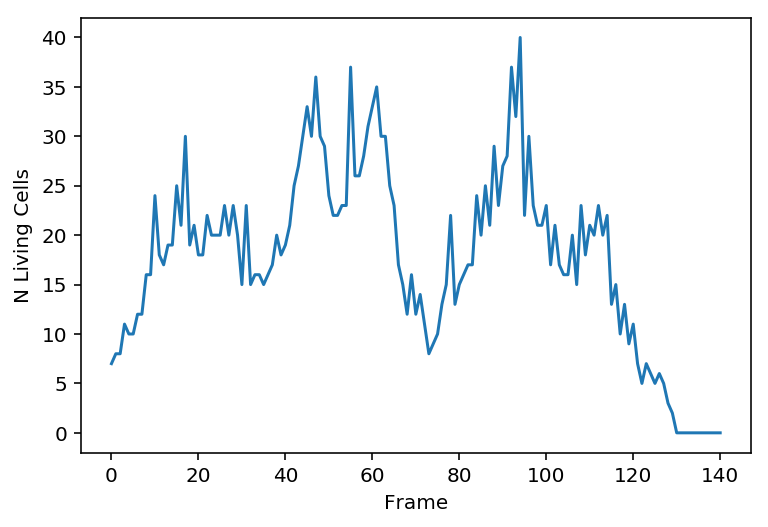

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAf521kYXQAAAKgBgX//5zcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv
cHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w
dGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o
ZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2
IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0
X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9
MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2Nv
bXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9
MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50
PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhl
YWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02
OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAIjGWIhAAR//73iB8yy2n5Otdy
EeetLq0fUO5GcV6kvf4gAAADABacmUP7YcdOWsNAAEKS8ERCh/sVzAJcnUJGApBIHFHR/vTGFXts
dgxuLvKE+884Md/LPdnjlYkIDA/XDNkDbJTMuElAikMInrh+J6KMFf2s//PgIiTVsSuhr72njgQC
/9UUt0xFiIolCtyn5Q3x9CZPY7n4/ougc5TpPWAsVZKYV4zfSNYsEe6kab6xLkATN3/GVZqS/rWc
2hn8qd6mwswbOpjUhMgI969wJ/w8y4cHjy0JezJZAozAYsopqED6SMQKOb8OzS5VGRq+VjQ3vRLA
Tpsng05C76IhMzUBTHKjcsup1EJD7Vw7D2D+JD9fJgAhR1chOPTLe4Dikxv4lnrXNNx5IgfUnhrs
2MMQCi2KmK3eDtSdww3a+gTI86ll08mHb2iwJaV975ACQYl0r1h4Zhn/97VDnDtYGHfgh+iZwIXx
A40Kt5VseyVDYmcbsHg5bdrSNQEHNAWG3tYq7XonoCFZ2AtR+D+CXeKCsf1ilg6NEdQxmwRAb8br
MpjI30WN6CKNEbxaCX4Rdn32JtxwHzfFbJoBVaYCWD9x035gCvXK8+ri1INvfws9KMMQoH9/Oy8I
/RD5iv+WSak/TS7Aqqx5t/sYNNtT5Bc/dQUy2+61uX14rfrqtvU8B65cCTu+vU5+uVY0hD4a7oId
dPhG/j4yhXt8lkwgXR8s2yhktnl5TDayGojcyl1OGfdwVU8NM0UpPoancyJfdJFVy81xMSJmy67+
aKcm1xJe8kjXEITP3LvEdi9pWqOfXE1rfNGg0WRh28LXOYFkPjNqDSjRzWdAyU4fCFLz/i248lhf
0kkHAQ42YlsswVCLRgYuinZNq2VQRe929m6aMnIj88u37b5ieSx+LQW8VecxhecMaL/5ltLzrYpb
9Q/26rmbH22oqUZbR+0nBWzXKK/2wCMrZu4OXONOLZDxA1ZlHU8smvd70ee3ztKoLLEW8lgPwr3/
GdMX3p4jddy20UWJNXy5IoSgAfAzS8cf0WUn3WN8ykF/pZQa3FUicpr2hHAgpyzc0BjDHYiyMo7L
4bd+lI1RaOMB+Cq3FwdZvzmS+q2Mb0NYkobdHRmo55Ihc/dyPD8iWVQGpoDXs0gtd9VbKAzvkI/J
GjGZvQ8ECc7TFz5JtBMaJowOs9axCnLe31GZE8vwwKJZYN5ASmP7BO+ZC0iEt3RBBP6shMKdMY11
AHkFrgk/e6WTmQ9+IifcH35EVF3/ygEWwRZ55XikYarlN6hBBX/cqz+ouhuG9Knx3xvjPhEAuK5z
HHCX1er2YYq37wD91BJ+N66XoHXLGNsBJdMfbFke8O6pMopBMwAX83wO2oOgmkeoFrK1vRVSQqCU
qT9wxTJbArsAV5/XUr9nkXShNEanZiGSbAJ6FOWy9MGbOPyKGuTUQBPuQdZlSc+uqJl/yFMBZczT
uqZ8ib9k8eRnS5IjsLN0E/1irI8CWR1mtCJGHZJUlEDxYRDud4AdEajvQ0HCBX467CKFL2GW/u7Q
oHIf7ORjwmT9WfJ8QLF7y3gWj+Qh7zUTpPRKQrKzhVyfE5glC6mLHko8MUxn7T28TBQGtDrBbMZf
84hvqwD187bWAZkyhGhKpEVJU7F06yd4m1QMffGWTL9FAOafXxZrWyW3uYJZeAPc9tN+SjO4EWTR
7dLJ/jocLV/9PoiWH0TRjzEDDOBl+Ke+JRRZwDksgdCBC9t8jdYs3BZj+GoyReHaq74YZ1VQ3//l
v90st91k4yo/35YzdwtjKnzW5oCTcXhjus7JrBX9lhOEHhyo0xS/iVaLMNGMjkFECHaA+n/rArcf
teD7zUrr13qv+P8t/x/1sEv3HFcnzME+/kAUvDg648Ufvu/2OAPaeR65E4+mneS3Fj/F8jVrjiv0
zLzSJpFbzcaXgGNFh4sJ7gBvEraW+9Um0yOE7287Sc4QLsEXU0mi3ITKjQhmJTY//yprS/oX4hcx
G/tiAXeTWymB+Z3s3NJ7fhZWZJAWxC1z3RZIS5KcXQ6LsJlM1Y6gQn/N1zJ9BOp8S9WCkr09LowH
Gna3KGkohfhSRBLdTlqjdiYJrXxB1FYcXd2N9MZ8iy2Fle+UTinntOCotT1g/wSO5sPAfl8f4xq2
N/1QevArunCd8pzMWTz9LSUH3of7CDNn3LlNy/8BRpoZc/aEacU2ZP6AIHA9GXzYG/zQ7rFv3lvC
m0pBdwAiLm/UgVVumHwqFt2DH6kKNDxso6eIvQI/5DbOhbieoEoaNs2AdqOPxByiIhFWqvSvcMU5
6g68f3pQ6mEdpcb09yYRNgBuKQATeqvVMdj0AnfvjImF/VBAd3UwON9mdtwP83wQWRBtw/XfGfGS
87Rf3cdbfF+34vX5iADdsH1E9oj8YGNE0/Trv3hIt4IMNn/meevtfg/UPMzclzy3uQs5M2IgObZ+
uMacQxiFs7WHFPw1Vp97V6M9eX2cey9tAL0lLOmBFhrmQbUFSYjzzNGBVSlEwfgA629DVNu8oLIz
JbQNPqe+EC0lnGmU3KoE6nF3qI+KzR5Bh41ZLYU1Rjr+MIZ2Jbjk65HY/viTiFwwg/BsqyLZHI/f
ARL533bLDOd2IliCbsMNqe98mqi96Pdu+FOY0ACZ3BOwuzE43H4VXRsLE+0ifX2is9G48Dbs0My8
UmzKDHgHUTIlMZia/jjREiAPzjsETtqJqM7FiUydRsw/Verc3GTd5YykMA4Ah42F4I/ldqjKRlHL
vdeOFFZPhUop8LXO+ZZD/PHCdycQ3Az2n7NTdrk/cS7OjVCNY1y8ShQhddqXdmsRHhrpxzcnHuTr
8XT2vFNjaYi5V8eyv7BHCMGj43Evyfeya32/fBXEBFeXnygROqB/6rkmUPYAZa3MxG/m5GrmotkA
A10GnPUAAAGPQZokbEEf/

In [8]:
diehard = Game("data/Die-Hard.txt")

dh_rlist, dh_livlist, dhframelist = part1run(diehard, 140)

print("Die Hard (Conway's rules)")
GeneralListPlot(dhframelist, dh_livlist, 'Frame',  'N Living Cells')
# We can see from the plot that life disappears at 130

# I could make a new function (or edit my current one) that allows you to start an animation from a given frame (DONE). And one to find the point of stabalisation/death. If I have some spare time before work I'll do that
animatefunction(diehard, 60, reset = 1, startframe = 100)

/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in long_scalars
/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in long_scalars


Die Hard (HighLife Rules)


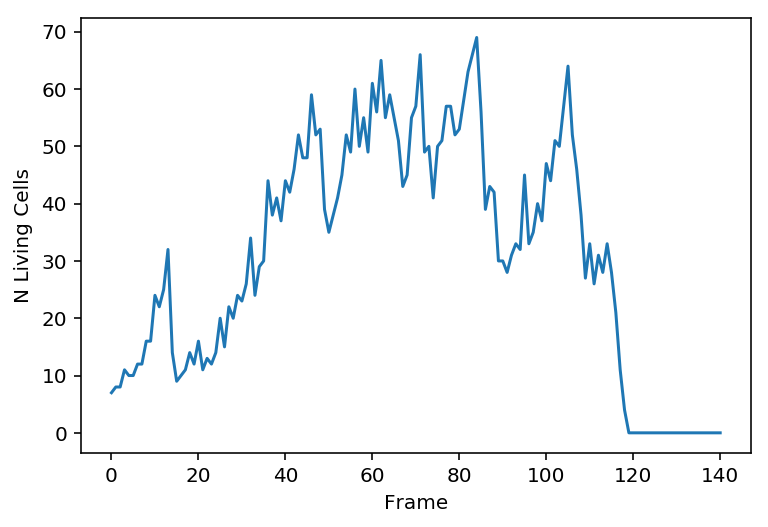

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAtdW1kYXQAAAKgBgX//5zcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv
cHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w
dGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o
ZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2
IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0
X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9
MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2Nv
bXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9
MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50
PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhl
YWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02
OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAALEWWIhAAR//73iB8yy2n5Otdy
EeetLq0fUO5GcV6kvf4gAAADABacmUP7YcdOWsNAAEKS8ERCh/sVzAJcnUJGApBIHFHR/vTGFXts
dgxuLvKE+884Md/LPdnjlYkIDA/XDNkDbJTMuElAikMInrh+J6KMFf2s//PgIiTVsSuhr72njgQC
/9UUt0xFiIolCtyn5Q3x9CZPY7n4/ougc5TpPWAsVZKYV4zfSNYsEe6kab6xLkATN3/GVZqS/rWc
2hn8qd6mwswbOpjUhMgI969wJ/w8y4cHjy0JezJZAozAYsopqED6SMQKOb8OzS5VGRq+VjQ3vRLA
Tpsng05C76IhMzUBTHKjcsup1EJD7Vw7D2D+JD9fJgAhR1chOPTLe4Dikxv4lnrXNNx5IgfUnhrs
2MMQCi2KmK3eDtSdww3a+gTI86ll08mHb2iwJaV975ACQYl0r1h8gxJ+FR0wqVhtlDDh2sDDvwQ/
RM4EL4gcaFW8q2PZKhsTON2DwctwKFPDCDmgLDb2sVdr0T0BCs7AWo/B/BLvFBWP6xSwdGiOoYzY
IgN+N1mUxkb6LG9BFGiN4tBL8Iuz77E244D5vitk0AqtMBLCApEjJ0HNLJojPliTq1IaUiCjDEKB
/fzsvCP0Q+Yr/lkmpP00uwKqsebf7GDTbU+QXP3UFMtvvEYl9eK366rb1PAeuXAk7vr1OfrlWNIQ
+Gu6CHXT4Rv4+MoV7fJZMIF0fLNsoZLZ5eUw2shqI3MpdThn3cFVPDTNFKT6Gp3MiX3SRVcvNcTE
iZsuu/minJtcSXvJI1xCEz9y7xHYvuG2PHgNPiBOp9tlwQqMHLbv5r/PvyxMo0c1nQMlOHwhS8/4
tuPJYX9JJBwEONmJbLMFQi0YGLop2TatyXGdkeK2dNGTkR+eXb9t8xPJY/FoLeKvOYwvOmNF/8y2
l51sUt+of7dVzNj7bUVKMto/aTgrZrlFf7YBGVs3cHLnGnFsh4gasyjqeWTXu96PPb52lUFliLeS
wH4V7/jOmL708Ruu5baKLEmr5ckUJQAPgZpeOP6LKDjbIFqVum7uKH22PdjrSSkQAgUJVbUxk+Nw
eiTAnzihKO46icVwpvCe5uxekp1c47AfJ2LdDDYMpdhxlq4pfnRz0caz/kh5me863mmta6XikNKO
zQpIuaSoGPqFaHJDilSZxxT2a7yDuWQh/fr4UBz9xbAl5qFHKxRCeasQLd+qDFk1LfNT+i4Qn52c
bWmZguFbpM979ICrd774Q4Tp8eRfeah+1pg1/bgGx25MVGG8AEk5HOrI8AJOvKhKMUtTKf+bYg1I
RIfBDkKE0M9vZ/Ec76orhmZ93h4g1ClRty6H4/isR+RLKoDU0Br47teNMEs8BnfIR+Pp/ZI9DwQJ
zeasLBNoJjRNGB1t5aX0IgBQUWdUNXgRB+gyFZwEpj+wTvl8e7sB5hcPBwQvVtdsfw6Fu6JfNv//
271t77LaJ7kf9F0FjmIYfjL2xjgcUC7O1nvgSda816wtFcUyJGYxJ0mp0okpgQV2z4dEwEalxzv7
fVoLP1D+OGtAgf5/NZiYeg2gv3xAuIR5YC1kJo6R+x5gM2BqeAZkDXJwCrIfcuiqfzKYwQRH7+ms
kU/9hStG3UNxwAbE2HXWhh6BHVETwobqf4k8UH0H50zcwcLiepShqxCldXW7vU4LTuQXxEkb/DBD
7KWPWK6Fs4CmDP6W3MLyvqkYsbHYr3mHkTmN4j3fVVcombhoOcESxBhRzmmqmn+dxzrsCSwsuObW
3FSPCPhnOwpjgDftU33TG+dlEjH/NbE6vIVTcOigWkFdXqQ60zZCKPfD1HGvcpjWw2XXDEtVXXmG
o1VYNDGAkXpRcld9dhq+Ek2GsUMQpAWDpp5q3kXKVGRqxYDlg6PtLPKK4i6kR8XfTJ62voeFj11n
2m1weFpfNoAkSrGIXImzgEHL3z1JIa9T0XGm12A0bl9o52XYpzsvNyrE5KkQU3UzRs++x6x7FuHO
wBskW4yS0jjE8buDAi7rlbh/1QMnrZOALfSObDlGl1Kyqd4HR1u+a0scdqHbAiW9xNycEe4qhzKj
IjZjDSSc1PEJ2d9oD0zlINO0e3KMNe8LYks5Y8bthf+o5WotGMgTZTLaVwscG/ypXnTFpYq/RQB1
Ov08sEfv5MEJLZ7JTgdS7lDFEFtuTlw/Dnc4koAnCnIzTglwI+CPECsLdMnbuB9FpiPJG7FeWQNy
LItl+4uhu1H1OwrYAS/Ur/V0UUuEb6O4uIfEywznC2KtLvV66tsaPyEAHEltluGXPdwnxJ+rVTJb
v724otvqRmG8SlzNhBZuCXVNmkivV7dTzlMTOXa7uCFr/6HF5eu2+bXxj96Ok2XXTX3o78/Eo73g
qkFzPqeJ8f7v35RQxBl3PiNyE08dsZNeVu6F+z+yZGB1e46AjJCUi22a2Ayj4NcJpFMclmiuDsUW
lmAC2sXCKMuKq53twb3c73GvF2IUksO3EadWH0QzidZ+qdFEzKZvHYWZjJQXyobPRQSV9DOn/k5Q
qBnR1Cnlb9xK+ruH7Z8mok4L46W8Y38hHtv39GUdHFCHqyfgRVYgabi1i4uf34ALXo7a/L90CBcn
tDXaceKJS11CvfyyaRymV2byrqT3nUT+MO05jM73V6+mfJ0nrcMELZO37HY5jD8tCFe1w2f57oN7
tQzd50JBlffWbshZRL128bfW+esTruHcrXSncAV3IvdOyit3QvKIbs+AywjQrBcZVPU7X8t782J8
baBnhAd5VlZDsf+XIiS3Xjl8auYcfhjGQ6TiM7cPU9zdMRKwCSok5ggoj12HGdNBTtu/h39V/AIP
vN2pBV+6OZTH//vsJXxXT6/akRa3qFmV3rAuikjeiVdUMvm/ooiEe/+uyCuMWoVzA59vbN4+H7Qy
cNHetpHeE4XjlZ2ihkhyx

In [9]:
diehardHL = Game('data/Die-Hard.txt', S = [2,3], B = [3,6])

dh_rlist, dh_livlist, dhframelist = part1run(diehardHL, 140)

print("Die Hard (HighLife Rules)")
GeneralListPlot(dhframelist, dh_livlist, 'Frame',  'N Living Cells')
## We can see from the plot that life disappears at frame ~118]

animatefunction(diehardHL, 60, reset = 1, startframe = 98)

## 3:   Pi-Hentomino [2 marks]

The Pi-Hentomino is a shape that stabilizes after a number of generations for Conway's rules (B3/S23)

Using the file Pi-Hentomino ("data/Pi-Hentomino.txt") and the B3/S23 rules :
  
  - Find the generation where the pattern stabilises
  - Plot an animatiom of ~40 frames leading to and ~10 frames after the stabilisation of the pattern.


Hint : The full evolution is shown below.

<video width="500" controls>
  <source src="Pi-Heptomino.mp4" type="video/mp4">
</video>

Pi-Hentomino (Conway's rules)


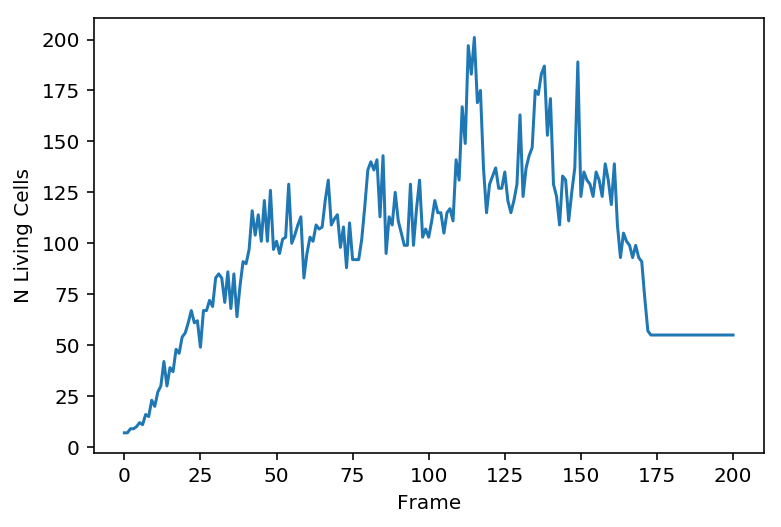

In [10]:
pihent = Game("data/Pi-Heptomino.txt") #The file location in the question is wrong

ph_rlist, ph_livlist, phframelist = part1run(pihent, 200)

print("Pi-Hentomino (Conway's rules)")
GeneralListPlot(phframelist, ph_livlist, 'Frame',  'N Living Cells')

# From the plot we can see the world population stabalises at ~170 frames

# pihent.reset()
# Ev(pihent, 130)
animatefunction(pihent, 50, reset = 1, startframe = 130) # Is there a reason this video doesn't work on my pc?

# pihent.reset()
# Ev(pihent, 130)
# animatefunction(pihent, 50, reset = 0) # This also doesn't work anymore...

# 4: Universe topologies with the Glider Gun animation :  [3 marks]

Using the file GliderGun ("data/GliderGun.txt") and Conway's rules  (B3/S23)
- Evolve the system for ~250 steps. 

Starting from the state of the system after the ~250  steps:
- Produce an animation of ~70 frames with toroidal boundary condition
- Produce an animation of ~70 frames assuming the cells crossing the boundary eventually go to infinity

On the 2nd case (when cells are not tracked after a distance from the boundary), try to avoid inacurracies/artifacts at the boundary.

The end result should look similar to the following (but with less frames).

<video width="500" controls>
  <source src="GliderGun_Wrapped.mp4" type="video/mp4">
</video>

<video width="500" controls>
  <source src="GliderGun.mp4" type="video/mp4">
</video>





In [11]:
glidergun = Game("data/GliderGun.txt")

print("Non-Toroidal (kinda, I'll fix it. Probably. Maybe.)")
# Ev(glidergun, 250)
animatefunction(glidergun, 70, reset = 1, startframe = 250)

print("Toroidal")
Ev(glidergun, 250)
# Insert toroidal function here

Non-Toroidal (kinda, I'll fix it. Probably. Maybe.)


## PHY428: "Methuselah" R-Pantomino  :  [2 marks]

The R-pentomino does not die. It is the simplest example of a methuselah, a pattern in Conway's game of life (B3/S23) that is small but takes a long time to stabilize.

Using the  "data/R-Pantomino.txt" and a geometry where the cells crossing the boundary are assumed
to go to infinity (2nd one from the previous exercise.)

- Verify that the population stabilises at ~1103 Generation (you can ignore the six gliders going out of screen as they do not add to the live population)

- After you verify the above, produce an animation of ~80 frames around the stabilization (e.g. ~80 frames  starting from generation 1050)

Hint: you can use the number of cells routine from the previous Lab and produce a plot of Number of live cells vs time measured in generations.<br>


For comparison the evolution for ~1150 generations is shown below:

<video align="centre" width="500" controls>
  <source src="R-Pantomino.mp4" type="video/mp4">
</video>

R-pentomino (HighLife Rules)


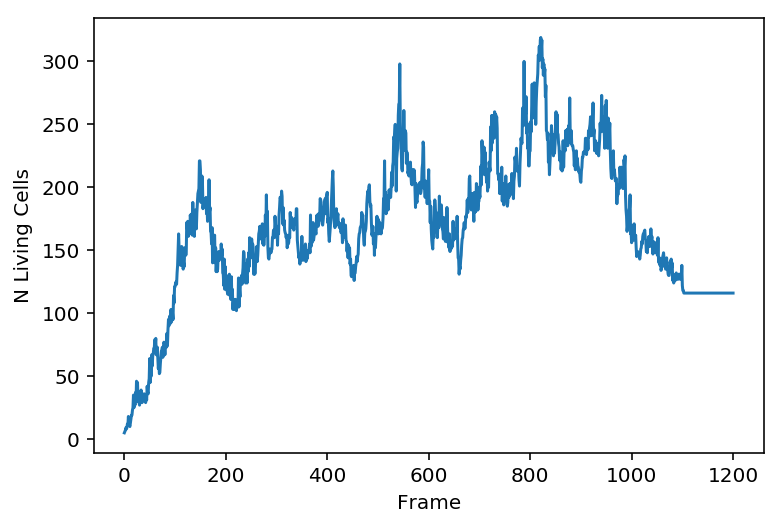

We can see that population stabilises somewhere around frame 1100


In [12]:
## Probably don't run this when marking, it runs for ages (as one might expect for a 1050 start frame)

rpanto = Game('data/R-Pantomino.txt')

rp_rlist, rp_livlist, rpframelist = part1run(rpanto, 1200)

print("R-pentomino (HighLife Rules)")
GeneralListPlot(rpframelist, rp_livlist, 'Frame',  'N Living Cells')
print('We can see that population stabilises somewhere around frame 1100')

animatefunction(rpanto, 80, reset = 1, startframe = 1050)